In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Importing dataset
ds = pd.read_csv('Algerian_forest_fire.csv', header =1)
ds.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
ds.shape

(246, 14)

## Data Cleaning

In [4]:
ds.drop([122,123,124],inplace=True)
ds.reset_index(drop=True,inplace=True)
ds['Region']=0

In [5]:
for i in range(len(ds)):
    if i<122:
        ds['Region'][i]=0
    else:
        ds['Region'][i]=1

In [6]:
ds

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
ds.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [8]:
#Trimming the extra space in column names
for i in ds.columns:
    ds.rename(columns={i:i.strip()},inplace = True)

In [9]:
ds.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
#checking fo null data
ds.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [11]:
ds['Classes']

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object

In [13]:
ds['Classes'][164]

nan

In [14]:
ds.iloc[164]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               1
Name: 164, dtype: object

In [15]:
ds.at[164,'DC']=14.6
ds.at[164,'ISI']=9
ds.at[164,'BUI']=12.5
ds.at[164,'FWI']=10.4
ds.at[164,'Classes']='fire'

In [16]:
ds.iloc[164]

day              14
month            07
year           2012
Temperature      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI               9
BUI            12.5
FWI            10.4
Classes        fire
Region            1
Name: 164, dtype: object

In [17]:
#Checking for null values again
ds.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
#checking for unique values
ds.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [19]:
ds.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [21]:
ds['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

we can observe that there are extra spaces in the values

In [22]:
#Trimming the extra spaces

In [23]:
ds['Classes']=[i.strip() for i in ds['Classes']]

In [24]:
ds['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [25]:
ds.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


We can notice that day and year column does not have any impact on the dataset 

In [26]:
ds.drop(columns=['year','day'],inplace =True)
ds.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,06,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,06,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,06,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,06,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,06,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [27]:
#Checking for datatypes of columns
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        243 non-null    object
 1   Temperature  243 non-null    object
 2   RH           243 non-null    object
 3   Ws           243 non-null    object
 4   Rain         243 non-null    object
 5   FFMC         243 non-null    object
 6   DMC          243 non-null    object
 7   DC           243 non-null    object
 8   ISI          243 non-null    object
 9   BUI          243 non-null    object
 10  FWI          243 non-null    object
 11  Classes      243 non-null    object
 12  Region       243 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 24.8+ KB


From above we can see that columns month,temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI are having categorical data which needs to be Numerical while region is numerical, which should be Categorical

In [34]:
ds.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [36]:
col=['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI','BUI', 'FWI']
ds[col]=ds[col].apply(pd.to_numeric)

In [37]:
ds['Region']=ds['Region'].apply(str)

In [38]:
ds.dtypes

month           object
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [41]:
#Checking for duplicates
ds.duplicated().sum()

0

## Statistical Analysis

In [43]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,243.0,32.172840,3.641327,22.0,30.00,32.0,35.00,42.0
RH,243.0,61.901235,14.903495,21.0,52.00,63.0,73.50,90.0
Ws,243.0,15.518519,2.806918,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.760905,2.003528,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.973251,14.304628,28.6,72.45,83.7,88.30,96.0
DMC,243.0,14.723457,12.368735,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.457202,47.644493,6.9,14.40,33.1,69.10,220.4
ISI,243.0,4.776955,4.154571,0.0,1.40,3.5,7.30,19.0
BUI,243.0,16.730453,14.202874,1.1,6.05,12.5,22.65,68.0
FWI,243.0,7.077366,7.430612,0.0,0.75,4.7,11.45,31.1


In [44]:
#Checking for Categorical and Numerical data in our dataset
C_col=[feature for feature in ds.columns if ds[feature].dtype =='O']
N_col = [feature for feature in ds.columns if ds[feature].dtype !='O']

In [45]:
ds[C_col].head()

,month,Classes,Region
0,06,not fire,0
1,06,not fire,0
2,06,not fire,0
3,06,not fire,0
4,06,not fire,0


In [46]:
ds[N_col].head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


## Univariate Analysis

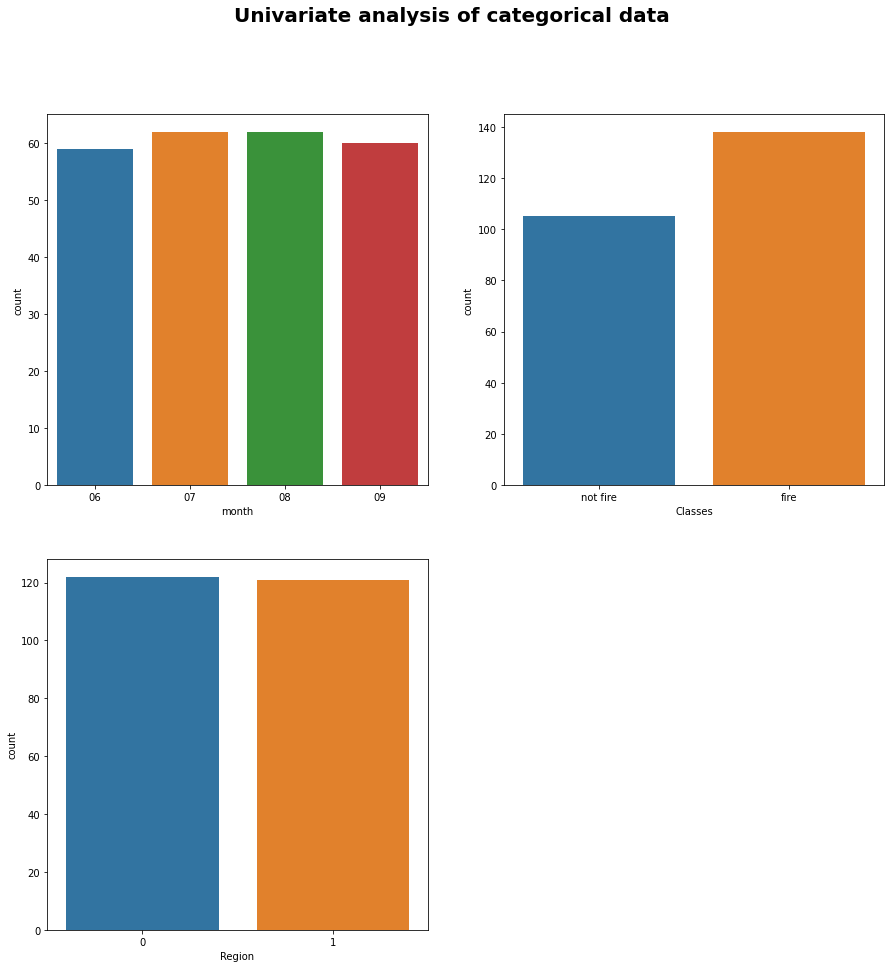

In [49]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of categorical data', fontsize=20,fontweight='bold')
C_col=[feature for feature in ds.columns if ds[feature].dtype =='O']
for i in range(0,len(C_col)):
    plt.subplot(2,2,i+1)
    sns.countplot(ds[C_col[i]])
    plt.xlabel(C_col[i])

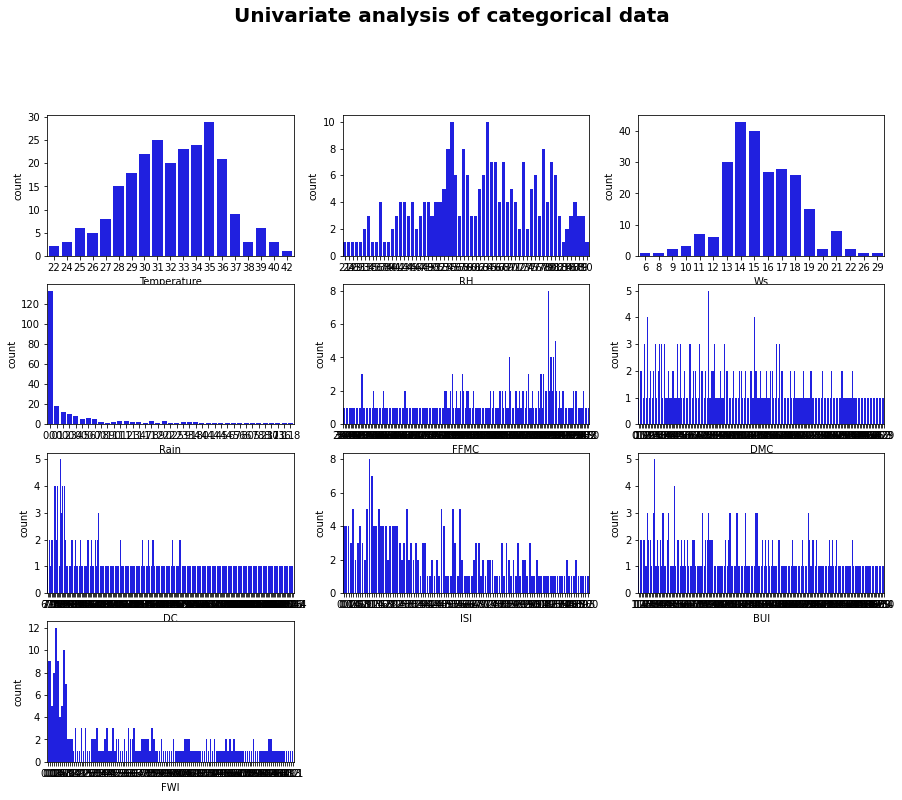

In [51]:
#Univariate analysis
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of categorical data', fontsize=20,fontweight='bold')
N_col=[feature for feature in ds.columns if ds[feature].dtype !='O']
for i in range(0,len(N_col)):
    plt.subplot(5,3,i+1)
    sns.countplot(ds[N_col[i]],color='b')
    plt.xlabel(N_col[i])

We can observe that Temperature,RH,Ws are normally distributed and Rain column has most no of outlier,FFMC is right skewed, DMC,DC,ISI,BUI,FWI are left skewed

In [52]:
##Multivariate Analysis

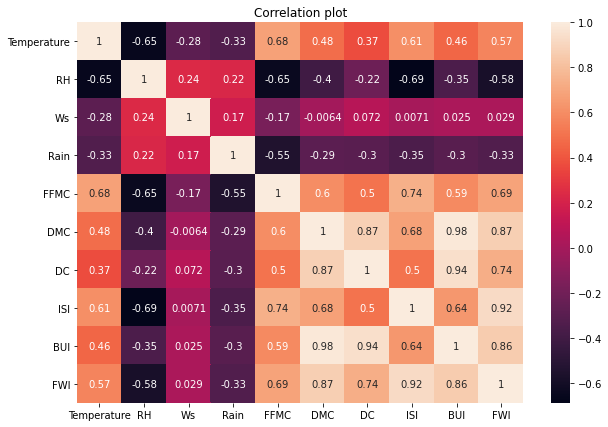

In [55]:
plt.figure(figsize=(10,7))
plt.title('Correlation plot')
sns.heatmap(ds[N_col].corr(),annot=True)
plt.show()

In [56]:
df=ds.drop('Classes',axis=1)
df.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Region'],
      dtype='object')

In [59]:
dfc=[feature for feature in ds.columns if ds[feature].dtype =='O']
dfn=[feature for feature in ds.columns if ds[feature].dtype !='O']

In [60]:
dfc

['month', 'Classes', 'Region']

In [61]:
dfn

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

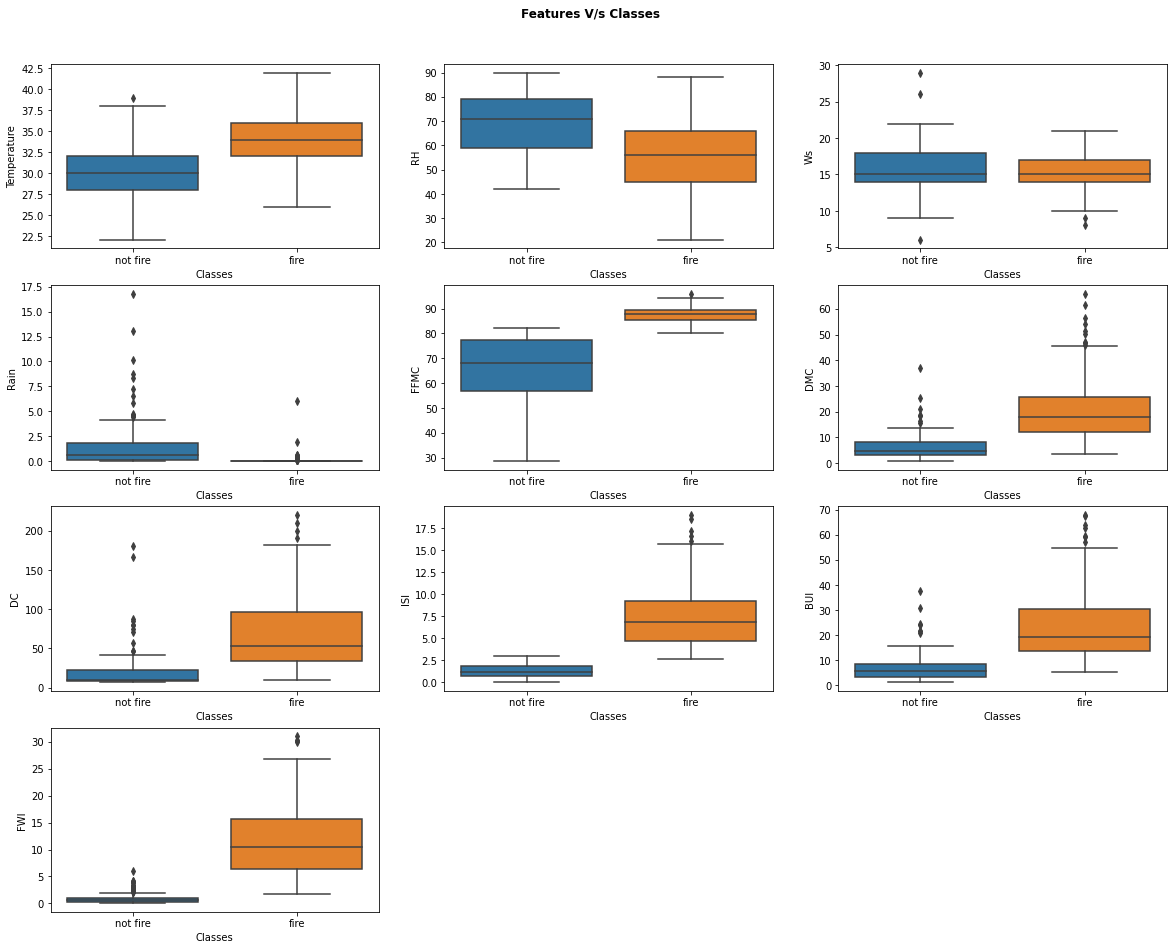

In [63]:
plt.figure(figsize=(20,40))
plt.suptitle("Features V/s Classes", fontweight='bold',y=0.9)
for i in range(0,len(dfn)):
    ax=plt.subplot(10,3,i+1)
    sns.boxplot(data=ds, x='Classes', y=ds[dfn[i]])

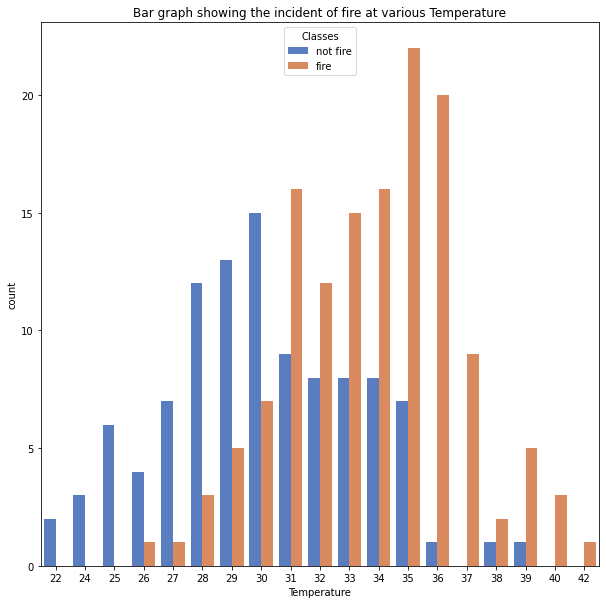

In [67]:
#Checking for temperature for impact on fire
plt.figure(figsize=(10,10))
plt.title('Bar graph showing the incident of fire at various Temperature')
sns.countplot(data=ds,hue='Classes', x='Temperature',palette='muted')

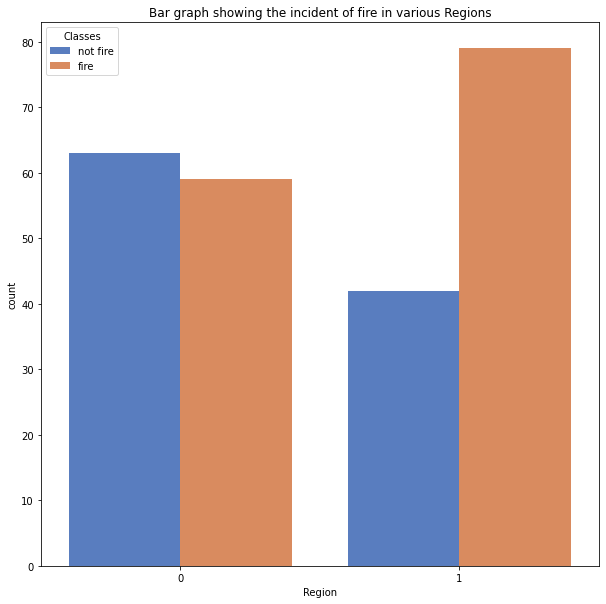

In [68]:
#Checking for region column for impact on fire
plt.figure(figsize=(10,10))
plt.title('Bar graph showing the incident of fire in various Regions')
sns.countplot(data=ds,hue='Classes', x='Region',palette='muted')

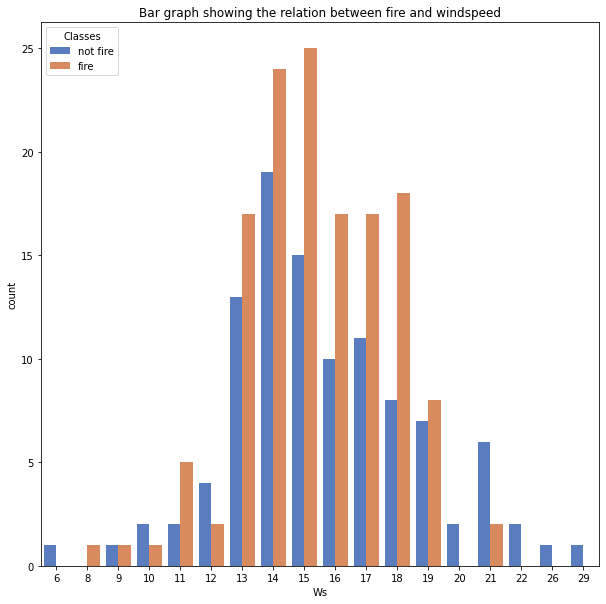

In [69]:
#checking for Wind speed column for impact on fire
plt.figure(figsize=(10,10))
plt.title('Bar graph showing the relation between fire and windspeed')
sns.countplot(data=ds,hue='Classes', x='Ws',palette='muted')

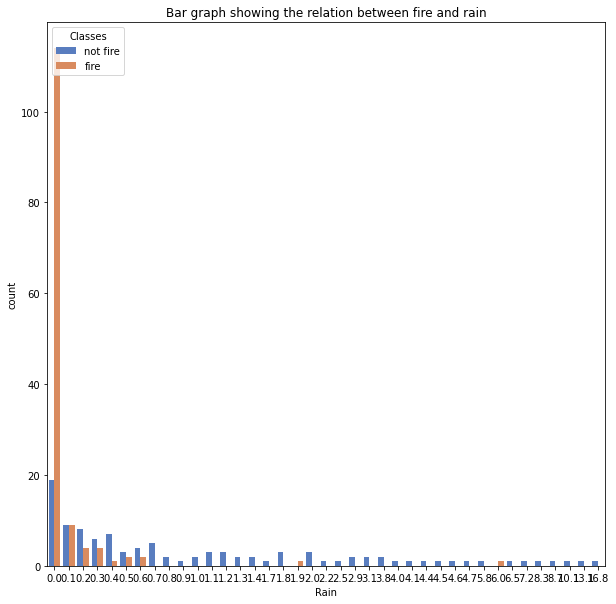

In [70]:
#checking for Wind speed column for impact on fire
plt.figure(figsize=(10,10))
plt.title('Bar graph showing the relation between fire and rain')
sns.countplot(data=ds,hue='Classes', x='Rain',palette='muted')

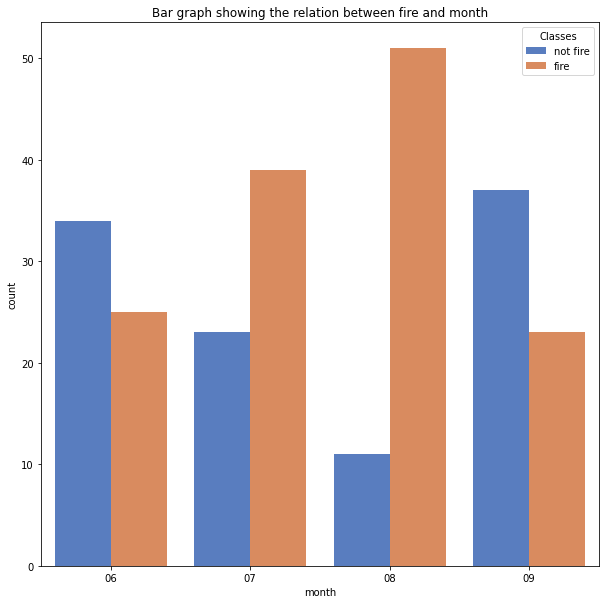

In [71]:
#checking for month in which fire occurence is more
plt.figure(figsize=(10,10))
plt.title('Bar graph showing the relation between fire and month')
sns.countplot(data=ds,hue='Classes', x='month',palette='muted')

## Simple Linear Regression

In [73]:
ds.keys()

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

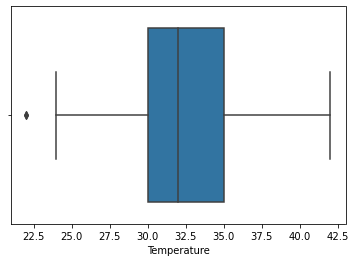

In [75]:
#outlier
sns.boxplot(ds['Temperature'])

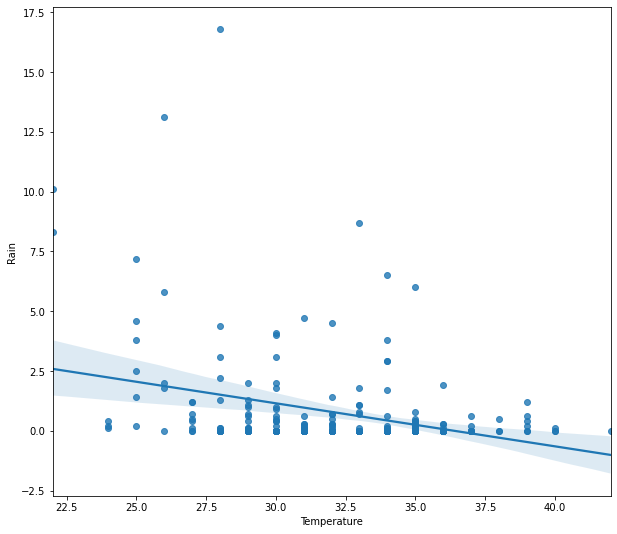

In [79]:
## Ridge Regression
plt.figure(figsize=(10,9))
sns.regplot(x='Temperature', y='Rain',data=ds)

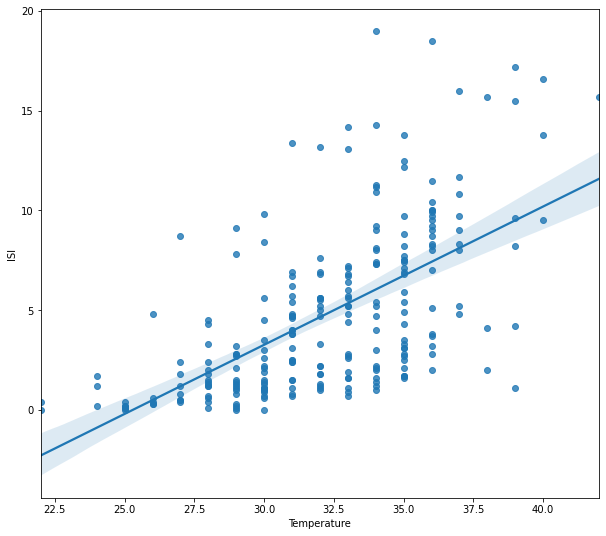

In [80]:
plt.figure(figsize=(10,9))
sns.regplot(x='Temperature', y='ISI',data=ds)

In [81]:
ds.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [104]:
#Independent Feature
x=pd.DataFrame(ds,columns=['RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region'])

In [105]:
#Dependent Feature
y=pd.DataFrame(ds,columns=['Temperature'])

In [106]:
x.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [107]:
y.head()

,Temperature
0,29
1,29
2,26
3,25
4,27


In [108]:
##Train-Test data

In [109]:
ds.shape

(243, 13)

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=10)
X_train.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
25,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,0
121,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,0
173,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,1
72,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,0
185,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9,1


In [111]:
X_train.shape

(162, 10)

In [112]:
Y_train.shape

(162, 1)

In [113]:
X_test.shape

(81, 10)

In [114]:
Y_test.shape

(81, 1)

In [115]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [118]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.0473997 ,  0.89679491, -0.43894049, ...,  0.39565587,
         0.53606168, -1.01242284],
       [ 0.98220418, -0.6165465 ,  0.43279071, ..., -0.99474977,
        -0.92522184, -1.01242284],
       [ 0.51480194,  0.51845956, -0.43894049, ...,  2.19883819,
         1.32932988,  0.9877296 ],
       ...,
       [-2.48992674, -0.99488186, -0.43894049, ...,  0.45358944,
         1.74683945,  0.9877296 ],
       [-0.2196873 , -0.6165465 , -0.31440746, ..., -0.69784023,
        -0.81388595,  0.9877296 ],
       [ 1.04897592, -1.37321721, -0.43894049, ..., -0.25609677,
        -0.81388595, -1.01242284]])

In [117]:
X_test=scaler.transform(X_test)
X_test

array([[ 4.48030189e-01, -6.16546502e-01, -4.38940489e-01,
         3.80498723e-01, -4.00436729e-01, -2.98351885e-01,
        -3.44200203e-01, -3.64722210e-01, -4.38127334e-01,
        -1.01242284e+00],
       [-9.54176529e-01,  1.27513027e+00, -4.38940489e-01,
         7.66460723e-01, -2.22150412e-01, -3.13054898e-01,
         1.08307335e+00, -2.70580162e-01,  4.94310722e-01,
         9.87729597e-01],
       [-4.86774290e-01,  1.40124205e-01, -4.38940489e-01,
         7.86424275e-01,  8.22098020e-01,  1.84747121e-01,
         8.65353655e-01,  5.54973188e-01,  8.97903313e-01,
         9.87729597e-01],
       [ 1.18251942e+00,  2.03180097e+00,  3.17251734e+00,
        -1.89534617e+00, -9.43785506e-01, -8.52865526e-01,
        -1.02155036e+00, -9.51299590e-01, -9.25221841e-01,
        -1.01242284e+00],
       [ 4.73996980e-02, -6.16546502e-01, -4.38940489e-01,
         1.54245137e-01, -7.57009364e-01, -6.91132381e-01,
        -5.86110974e-01, -7.63015493e-01, -7.99968968e-01,
         9.

## Model Training

In [120]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg

LinearRegression()

In [121]:
reg.fit(X_train,Y_train)

LinearRegression()

In [122]:
print(reg.coef_)

[[-1.5017453  -0.64229443 -0.22805114  0.92880812 -0.10810077  0.30221438
   0.36273807  0.51476012 -0.5060751   0.17689905]]


In [123]:
print(reg.intercept_)

[32.01851852]


In [125]:
#prediction for test data
reg_pred=reg.predict(X_test)
reg_pred

array([[31.87835788],
       [33.55199848],
       [33.77692716],
       [25.72691651],
       [32.43386689],
       [33.5961062 ],
       [31.67314652],
       [34.60028541],
       [32.91026932],
       [33.52521116],
       [34.02449982],
       [32.88192322],
       [35.79851524],
       [31.97710154],
       [34.12410497],
       [33.44708989],
       [27.52817559],
       [36.1285286 ],
       [32.68911992],
       [24.6613159 ],
       [32.10673211],
       [32.47087044],
       [33.11060987],
       [33.21669011],
       [30.06057551],
       [34.02671515],
       [33.97025267],
       [35.27573609],
       [31.89227089],
       [34.63511512],
       [34.05186368],
       [33.98080081],
       [32.57084694],
       [32.7722343 ],
       [31.03907623],
       [28.7217524 ],
       [32.24822288],
       [31.97190206],
       [33.35215667],
       [33.87477205],
       [34.25270449],
       [33.94695402],
       [34.09160968],
       [37.31793804],
       [32.76693726],
       [36

## Assumptions of Linear Regression

Text(0, 0.5, 'Test predicted Value')

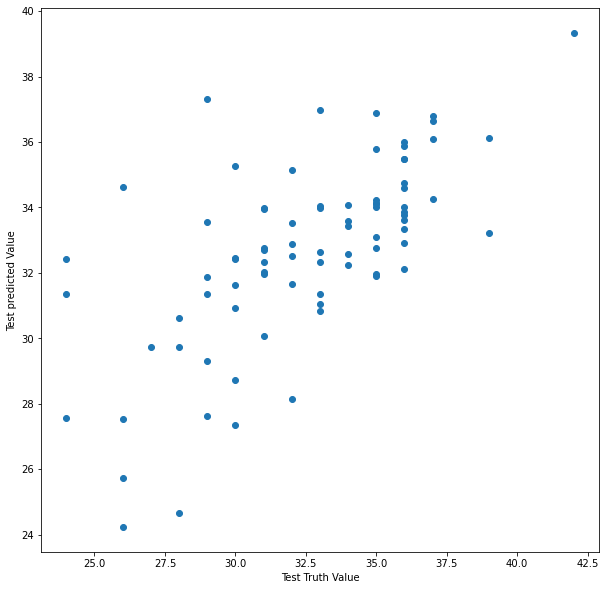

In [138]:
#relation between truth value and Predicted value
plt.figure(figsize=(10,10))
plt.scatter(Y_test,reg_pred)
plt.xlabel('Test Truth Value')
plt.ylabel('Test predicted Value')

In [140]:
#Residuals
residuals=Y_test-reg_pred
residuals

,Temperature
46,-2.878358
225,-4.551998
180,2.223073
116,0.273083
124,-2.433867
...,...
127,0.773526
241,-8.434546
207,-3.965002
102,2.652581


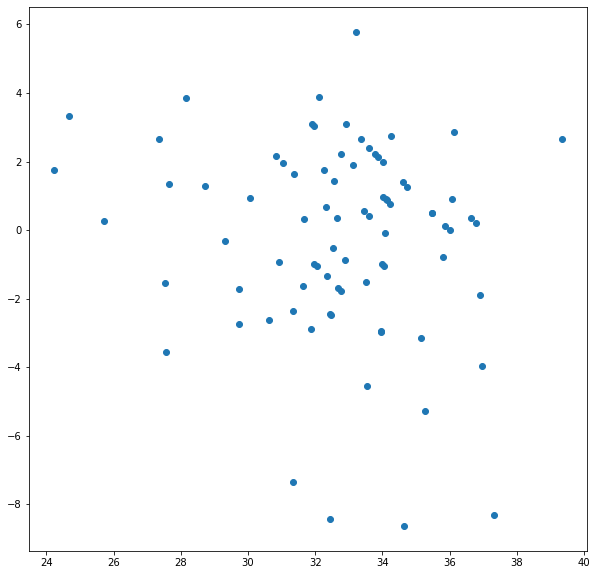

In [142]:
## Scatter plot with predictions and residuals
plt.figure(figsize=(10,10))
plt.scatter(reg_pred,residuals)

In [143]:
## Performance Metrics

In [144]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [145]:
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))


7.936814641352031
2.1430423395896914
2.8172352832789866


In [147]:
# R-square and adjusted R square
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
score

0.4177965512632693

In [148]:
##Adjusted R-square
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.33462463001516496

In [149]:
## Ridge Regression Algorithm
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1)
ridge.fit(X_train,Y_train)

Ridge(alpha=1)

In [150]:
ridge.coef_

array([[-1.48317807, -0.6411185 , -0.22950611,  0.93766237,  0.01157397,
         0.34039935,  0.28855835,  0.29708428, -0.37704398,  0.17369952]])

In [151]:
ridge.intercept_

array([32.01851852])

In [152]:
#Prediction for test data
ridge_pred=ridge.predict(X_test)
ridge_pred

array([[31.8822756 ],
       [33.5438447 ],
       [33.80879591],
       [25.75106028],
       [32.42222698],
       [33.62491361],
       [31.64516402],
       [34.63845705],
       [32.92837434],
       [33.49761804],
       [33.99353167],
       [32.88953015],
       [35.78623103],
       [31.95594322],
       [34.04991003],
       [33.46169407],
       [27.55255037],
       [36.1074258 ],
       [32.6830089 ],
       [24.65172367],
       [32.08348159],
       [32.42797473],
       [33.10733086],
       [33.18780552],
       [30.06403217],
       [34.04581485],
       [33.95939045],
       [35.2620418 ],
       [31.89157555],
       [34.58573007],
       [34.05124985],
       [33.94484211],
       [32.53900709],
       [32.77188186],
       [30.96852437],
       [28.73685859],
       [32.22460372],
       [31.98062172],
       [33.35726206],
       [33.85336821],
       [34.28756027],
       [33.94742555],
       [34.0984306 ],
       [37.2407982 ],
       [32.77403778],
       [36

## Assumptions of ridge Regression


Text(0, 0.5, 'Test predicted Value')

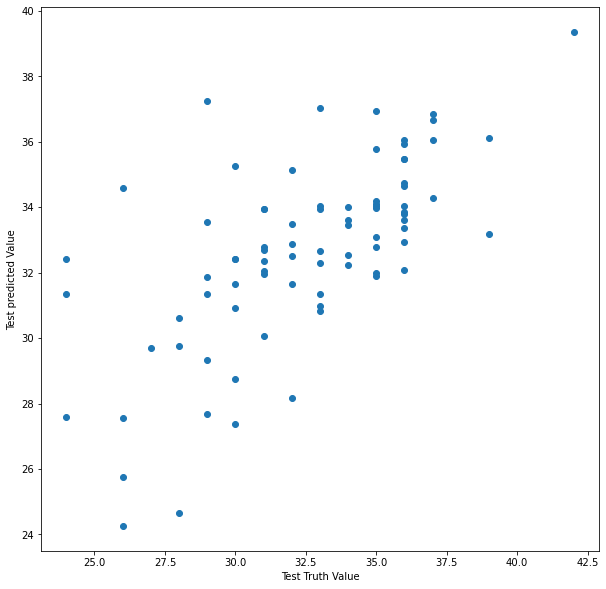

In [154]:
#relation between truth value and predicted value
plt.figure(figsize=(10,10))
plt.scatter(Y_test,ridge_pred)
plt.xlabel('Test Truth Value')
plt.ylabel('Test predicted Value')

In [157]:
residual = Y_test-ridge_pred
residual

,Temperature
46,-2.882276
225,-4.543845
180,2.191204
116,0.248940
124,-2.422227
...,...
127,0.794605
241,-8.414536
207,-4.030021
102,2.634066


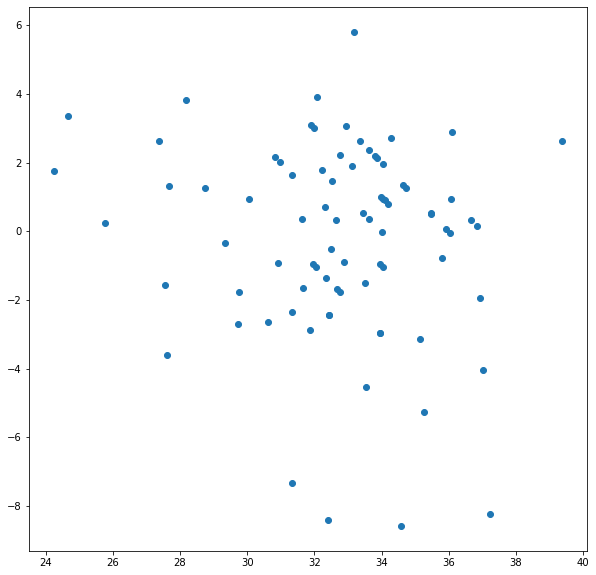

In [158]:
#Scatter plot with predictions and residuals
plt.figure(figsize=(10,10))
plt.scatter(ridge_pred,residuals)

In [159]:
#performance metrics

In [160]:
print(mean_squared_error(Y_test,ridge_pred))
print(mean_absolute_error(Y_test,ridge_pred))
print(np.sqrt(mean_squared_error(Y_test,ridge_pred)))


7.9083123853530255
2.140058450679967
2.8121721827357984


In [161]:
# R-square and adjusted R square
from sklearn.metrics import r2_score
score=r2_score(Y_test,ridge_pred)
score

0.419887328544742

In [162]:
##Adjusted R-square
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.33701408976541936

## Lasso Regression Algorithm

In [163]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1)
lasso.fit(X_train,Y_train)

Lasso(alpha=1)

In [164]:
lasso.coef_

array([-0.91280146, -0.        , -0.        ,  0.90173726,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [165]:
lasso.intercept_

array([32.01851852])

In [166]:
#Prediction for test data
lasso_pred=lasso.predict(X_test)

In [167]:
lasso_pred

array([31.95266578, 33.58063844, 33.17199487, 29.2300088 , 32.11434059,
       33.00209116, 32.22012359, 33.59769723, 32.74029189, 33.03646764,
       32.4140298 , 32.63133753, 34.4768768 , 31.56013792, 32.83278845,
       33.36084355, 29.21895063, 34.86185996, 32.35942318, 29.52498257,
       32.34519365, 32.18977836, 32.58238943, 31.77830553, 31.09963378,
       33.24494547, 32.87985037, 34.11623824, 32.00727241, 31.9424675 ,
       33.25188919, 33.145422  , 32.79267024, 32.5523863 , 31.34728674,
       29.96302828, 32.32590659, 32.22458014, 33.3728448 , 33.23637448,
       33.25694673, 34.12729641, 33.23294422, 33.78620381, 32.89913743,
       34.65406632, 33.97539458, 33.74359843, 31.6914675 , 31.35705972,
       32.23058076, 35.54841851, 32.12351258, 33.62864345, 28.94703628,
       34.4611032 , 34.54605505, 32.48603732, 28.79230519, 32.17340377,
       31.99784153, 31.39709472, 29.07905006, 34.22896496, 33.41990672,
       30.14750361, 31.32037177, 31.40215226, 34.10235082, 30.40

Text(0, 0.5, 'Test predicted Value')

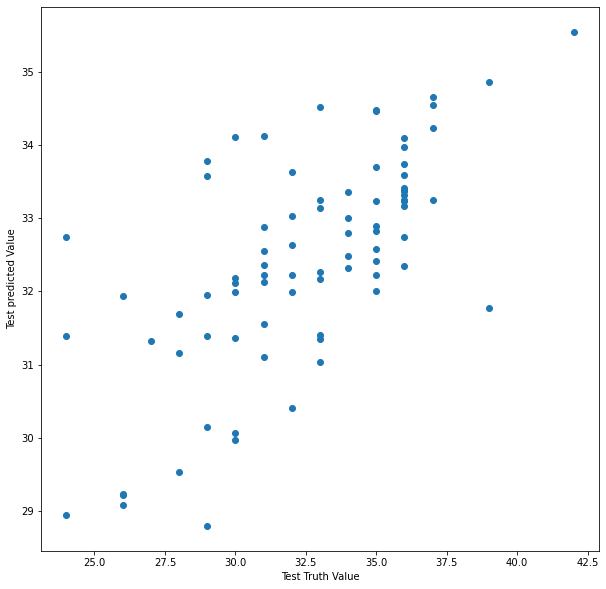

In [168]:
##Assumptions of Lasso Linear Regression
plt.figure(figsize=(10,10))
plt.scatter(Y_test,lasso_pred)
plt.xlabel('Test Truth Value')
plt.ylabel('Test predicted Value')

In [170]:
lasso_pred=lasso_pred.reshape(81,1)

In [171]:
residual=Y_test-lasso_pred

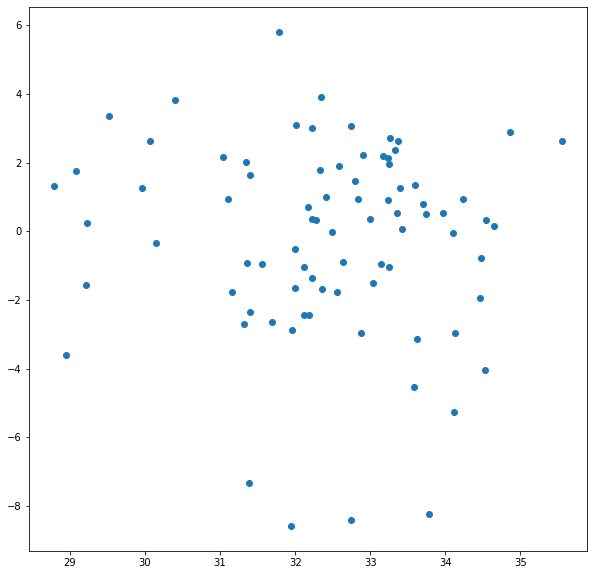

In [172]:
#Scatter plot with predictions and residuals
plt.figure(figsize=(10,10))
plt.scatter(lasso_pred,residuals)

In [173]:
#performance metrics
print(mean_squared_error(Y_test,lasso_pred))
print(mean_absolute_error(Y_test,lasso_pred))
print(np.sqrt(mean_squared_error(Y_test,lasso_pred)))


8.47662671402413
2.3529241290496663
2.9114647025207314


In [175]:
# R-square and adjusted R square
from sklearn.metrics import r2_score
score=r2_score(Y_test,lasso_pred)
score

0.3781987447651851

In [176]:
##Adjusted R-square
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.2893699940173544

## ElasticNet Rgression Algorithm


In [179]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train,Y_train)

ElasticNet()

In [180]:
#Prediction for test data
el_pred=elastic.predict(X_test)

Text(0, 0.5, 'Test predicted Value')

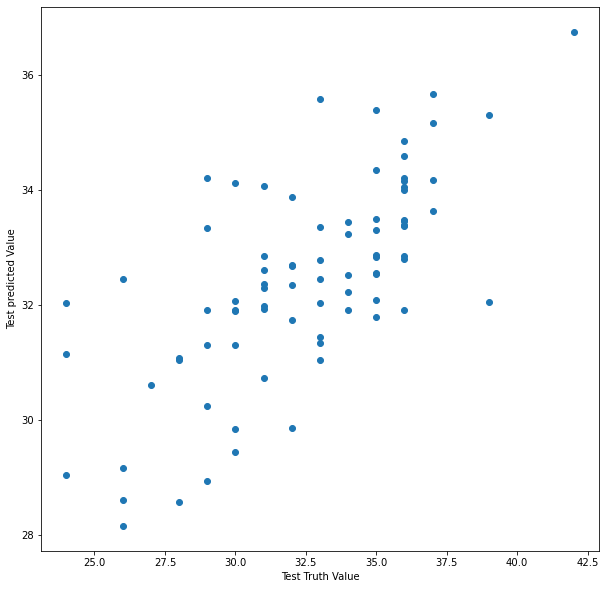

In [181]:
#Assumptions of ElasticNet regression
plt.figure(figsize=(10,10))
plt.scatter(Y_test,el_pred)
plt.xlabel('Test Truth Value')
plt.ylabel('Test predicted Value')

In [186]:
el_pred=el_pred.reshape(81,1)

In [187]:
#residuals
residuals=Y_test- el_pred

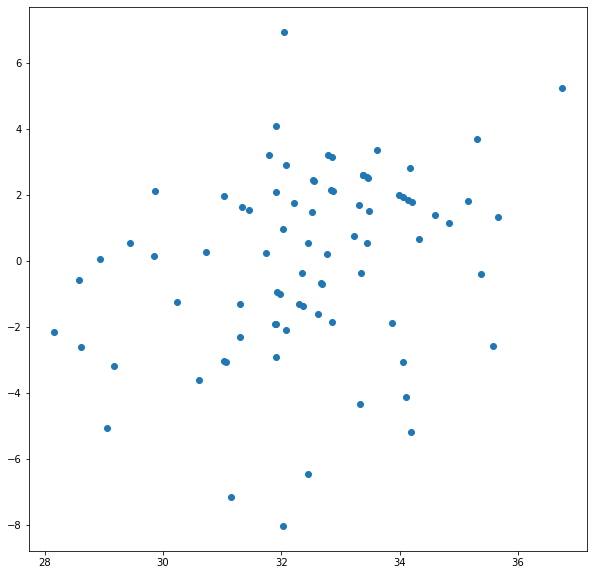

In [188]:
#Scatter plot with predictions and residuals
plt.figure(figsize=(10,10))
plt.scatter(el_pred,residuals)

In [189]:
#performance metrics
print(mean_squared_error(Y_test,el_pred))
print(mean_absolute_error(Y_test,el_pred))
print(np.sqrt(mean_squared_error(Y_test,el_pred)))

7.745090293519188
2.2553040698257694
2.783000232396539


In [191]:
# R-square and adjusted R square
from sklearn.metrics import r2_score
score=r2_score(Y_test,el_pred)
score

0.431860452407377

In [192]:
##Adjusted R-square
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.35069765989414514